In [20]:
import os
import json
import pandas as pd
import seaborn as sns

suffixes = ['B', 'KB', 'MB', 'GB', 'TB', 'PB']


def humansize(nbytes):
    i = 0
    while nbytes >= 1024 and i < len(suffixes)-1:
        nbytes /= 1024.
        i += 1
    f = ('%.2f' % nbytes).rstrip('0').rstrip('.')
    return '%s %s' % (f, suffixes[i])

In [21]:
# Convert Logs to a dataframe
path = "./logs/"
dir_list = os.listdir(path)

logs = []

for file in dir_list:
    with open("./logs/" + file, 'r') as f:
        for line in f.readlines():
            jsonData = json.loads(line)
            if jsonData["level"] == "info" and jsonData["message"] == "FINISH":
                logs.append(jsonData)
                #print(jsonData)

df = pd.DataFrame(logs)

df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%dT%H:%M:%SZ")


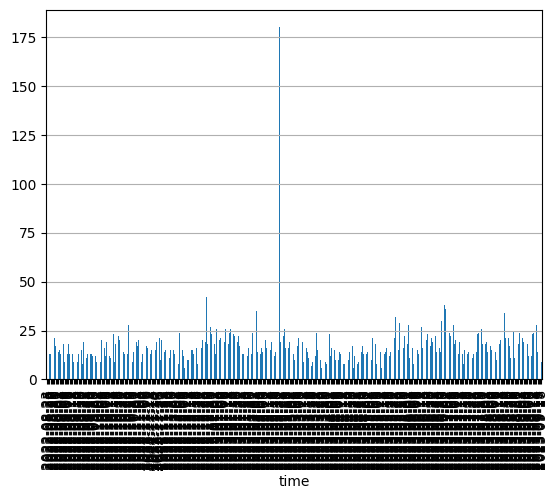

In [22]:
# Connections per day

connPlot = df["time"].groupby(df["time"].dt.date).count().plot(kind="bar")
connPlot.yaxis.grid(True)


c:\Users\Aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


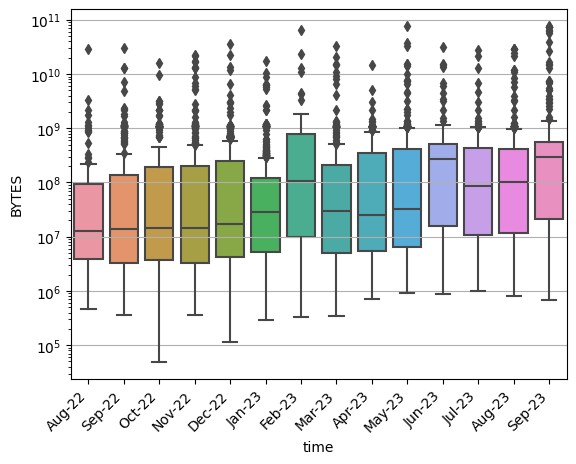

In [27]:
ax = sns.boxplot(x=df["time"].dt.strftime('%b-%y'), y=df["BYTES"])
ax.set(yscale="log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  
                   horizontalalignment="right")
ax.yaxis.grid(True)


In [24]:
humansize(df.BYTES.sum())


'3.25 TB'

In [29]:
minutes = df.DURATION.sum()/60000 

print(minutes,  "minutes")
print(minutes/60, "hours")
print(minutes/60/24, "days")

12497.8068310745 minutes
208.29678051790833 hours
8.679032521579513 days
